In [1]:
import pandas as pd
import glob, os

data_dir = r"C:\Users\mitta\OneDrive\Desktop\MAJOR\physionet.org\files\challenge-2019\1.0.0\training\training_setB"
output_file = "merged_training_setB.csv"

all_files = glob.glob(os.path.join(data_dir, "*.psv"))
print(f"Found {len(all_files)} files")

merged_df = pd.DataFrame()

for idx, file in enumerate(all_files, start=1):
    try:
        df = pd.read_csv(file, sep='|')
        df['patient_id'] = os.path.basename(file).replace('.psv', '')  # Add patient ID
        merged_df = pd.concat([merged_df, df], ignore_index=True)
    except Exception as e:
        print(f"Error reading {file}: {e}")
    
    # Save periodically every 500 files to prevent memory overflow
    if idx % 500 == 0:
        print(f"Processed {idx} files...")
        merged_df.to_csv(output_file, mode='a', header=not os.path.exists(output_file), index=False)
        merged_df = pd.DataFrame()  # clear from memory

# Save remaining data
if not merged_df.empty:
    merged_df.to_csv(output_file, mode='a', header=not os.path.exists(output_file), index=False)

print("✅ Merging complete. File saved as:", output_file)


Found 20000 files
Processed 500 files...
Processed 1000 files...
Processed 1500 files...
Processed 2000 files...
Processed 2500 files...
Processed 3000 files...
Processed 3500 files...
Processed 4000 files...
Processed 4500 files...
Processed 5000 files...
Processed 5500 files...
Processed 6000 files...
Processed 6500 files...
Processed 7000 files...
Processed 7500 files...
Processed 8000 files...
Processed 8500 files...
Processed 9000 files...
Processed 9500 files...
Processed 10000 files...
Processed 10500 files...
Processed 11000 files...
Processed 11500 files...
Processed 12000 files...
Processed 12500 files...
Processed 13000 files...
Processed 13500 files...
Processed 14000 files...
Processed 14500 files...
Processed 15000 files...
Processed 15500 files...
Processed 16000 files...
Processed 16500 files...
Processed 17000 files...
Processed 17500 files...
Processed 18000 files...
Processed 18500 files...
Processed 19000 files...
Processed 19500 files...
Processed 20000 files...
✅ 

In [4]:
df = pd.read_csv("merged_training_setB.csv", sep=",")
print(df.shape)
df.head()

(761995, 42)


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,patient_id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,1,0,p100001
1,93.0,92.5,NaN,110.0,76.0,56.0,22.0,NaN,NaN,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,2,0,p100001
2,91.0,96.0,NaN,108.0,84.5,72.0,23.5,NaN,NaN,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,3,0,p100001
3,93.0,98.0,NaN,123.0,87.0,61.0,21.0,NaN,NaN,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,4,0,p100001
4,93.0,95.0,NaN,110.0,81.0,70.0,20.0,NaN,NaN,NaN,...,NaN,NaN,73,1,1.0,0.0,-214.64,5,0,p100001


In [6]:
df.info()
df.isnull().sum().sort_values(ascending=False).head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761995 entries, 0 to 761994
Data columns (total 42 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HR                669785 non-null  float64
 1   O2Sat             654338 non-null  float64
 2   Temp              258325 non-null  float64
 3   SBP               655931 non-null  float64
 4   MAP               649583 non-null  float64
 5   DBP               655738 non-null  float64
 6   Resp              600918 non-null  float64
 7   EtCO2             57636 non-null   float64
 8   BaseExcess        1764 non-null    float64
 9   HCO3              1411 non-null    float64
 10  FiO2              17210 non-null   float64
 11  pH                16958 non-null   float64
 12  PaCO2             17013 non-null   float64
 13  SaO2              14401 non-null   float64
 14  AST               13363 non-null   float64
 15  BUN               42092 non-null   float64
 16  Alkalinephos      13

HCO3                760584
BaseExcess          760231
Bilirubin_direct    760187
Fibrinogen          757783
Chloride            757306
PTT                 754602
AST                 748632
Alkalinephos        748586
Bilirubin_total     748547
TroponinI           748179
Lactate             747692
SaO2                747594
pH                  745037
PaCO2               744982
FiO2                744785
Phosphate           739590
Magnesium           725525
WBC                 721896
Platelets           721285
BUN                 719903
dtype: int64

In [8]:
threshold=0.8*len(df)
df=df.dropna(thresh=threshold,axis=1)

In [10]:
df = df.sort_values(by=["patient_id", "ICULOS"]).reset_index(drop=True)


In [12]:
df = df.groupby("patient_id").apply(lambda group: group.ffill().bfill()).reset_index(drop=True)


C:\Users\mitta\AppData\Local\Temp\ipykernel_22320\3746873031.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("patient_id").apply(lambda group: group.ffill().bfill()).reset_index(drop=True)


In [14]:
df.isnull().sum().sum()

5080

In [16]:
df = df.fillna(df.median(numeric_only=True))


In [18]:
df.isnull().sum().sum()

0

In [20]:
df.head()

,HR,O2Sat,SBP,MAP,DBP,Age,Gender,HospAdmTime,ICULOS,SepsisLabel,patient_id
0,93.0,92.5,110.0,76.0,56.0,73,1,-214.64,1,0,p100001
1,93.0,92.5,110.0,76.0,56.0,73,1,-214.64,2,0,p100001
2,91.0,96.0,108.0,84.5,72.0,73,1,-214.64,3,0,p100001
3,93.0,98.0,123.0,87.0,61.0,73,1,-214.64,4,0,p100001
4,93.0,95.0,110.0,81.0,70.0,73,1,-214.64,5,0,p100001


In [22]:
from sklearn.preprocessing import StandardScaler

num_cols = df.select_dtypes(include=['float64','int64']).columns
num_cols = [col for col in num_cols if col not in ['SepsisLabel', 'patient_id']]

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [28]:
df['Gender'] = df['Gender'].astype('category').cat.codes



In [30]:
print(df.columns.tolist())



['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Age', 'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'patient_id']


In [34]:
df.head().columns


Index(['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Age', 'Gender', 'HospAdmTime',
       'ICULOS', 'SepsisLabel', 'patient_id'],
      dtype='object')

In [36]:
df.to_csv("cleaned_training_setB.csv", index=False)
print("✅ Cleaned dataset saved as cleaned_training_setB.csv")


✅ Cleaned dataset saved as cleaned_training_setB.csv


In [38]:
print(df.shape)
print(df.columns)
df.info()
df.describe()
df['SepsisLabel'].value_counts()


(761995, 11)
Index(['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'Age', 'Gender', 'HospAdmTime',
       'ICULOS', 'SepsisLabel', 'patient_id'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761995 entries, 0 to 761994
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   HR           761995 non-null  float64
 1   O2Sat        761995 non-null  float64
 2   SBP          761995 non-null  float64
 3   MAP          761995 non-null  float64
 4   DBP          761995 non-null  float64
 5   Age          761995 non-null  float64
 6   Gender       761995 non-null  int8   
 7   HospAdmTime  761995 non-null  float64
 8   ICULOS       761995 non-null  float64
 9   SepsisLabel  761995 non-null  int64  
 10  patient_id   761995 non-null  object 
dtypes: float64(8), int64(1), int8(1), object(1)
memory usage: 58.9+ MB


SepsisLabel
0    751215
1     10780
Name: count, dtype: int64

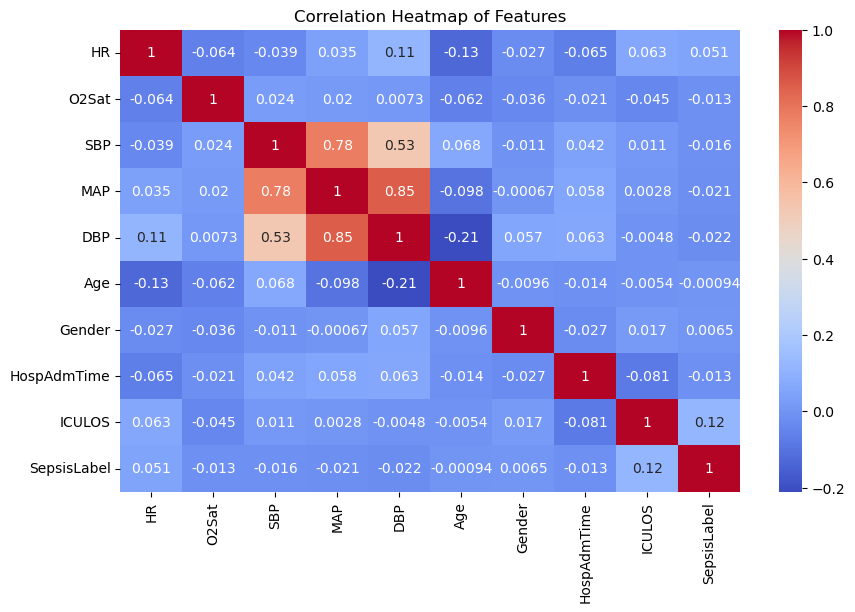

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric column
df_numeric = df.drop(columns=['patient_id'])

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Separate features and target
X = df_numeric.drop(columns=['SepsisLabel'])
y = df_numeric['SepsisLabel']

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (609596, 9)
Test set: (152399, 9)


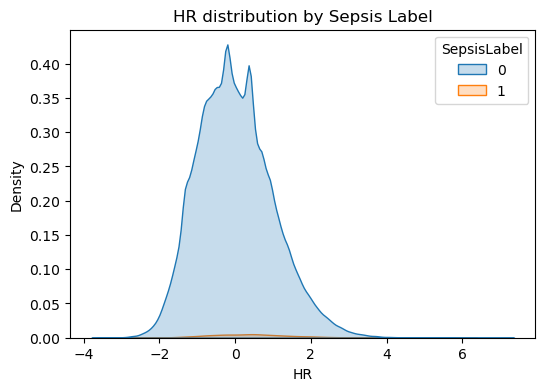

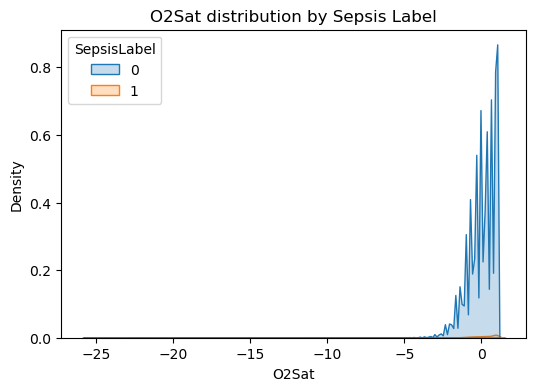

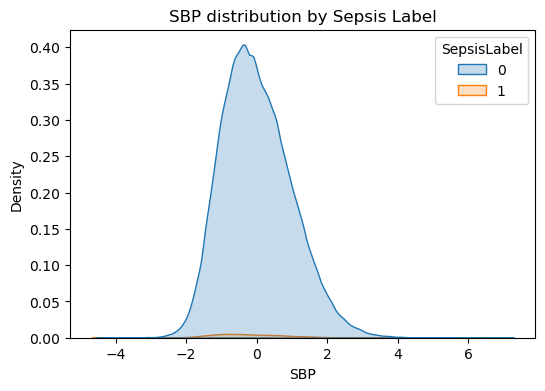

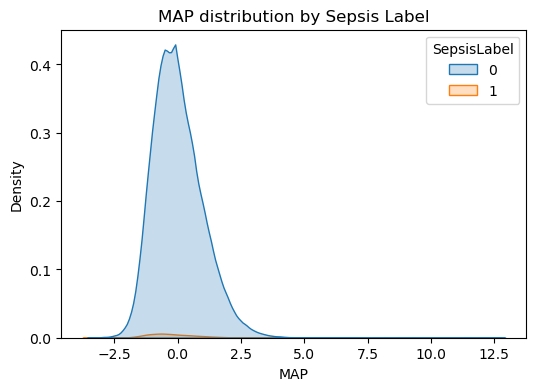

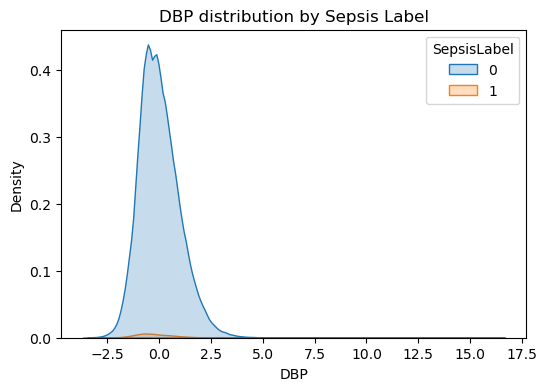

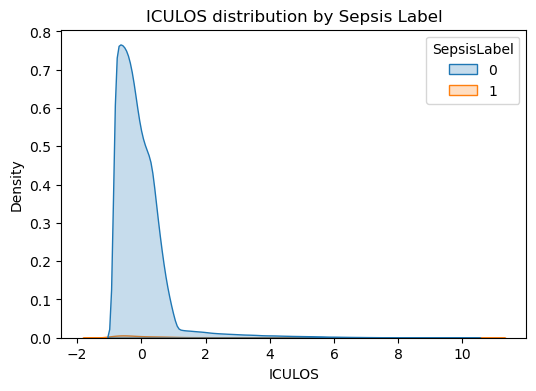

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['HR', 'O2Sat', 'SBP', 'MAP', 'DBP', 'ICULOS']
for col in cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue="SepsisLabel", fill=True)
    plt.title(f"{col} distribution by Sepsis Label")
    plt.show()


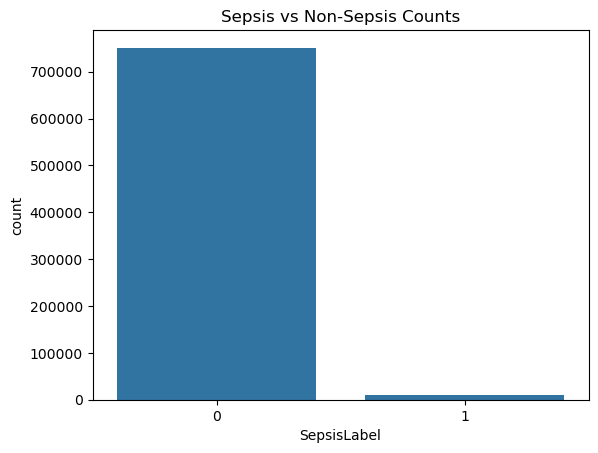

In [56]:
sns.countplot(x='SepsisLabel', data=df)
plt.title('Sepsis vs Non-Sepsis Counts')
plt.show()


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

# Step 1: Separate features and target
X = df.drop(['SepsisLabel', 'patient_id'], axis=1)
y = df['SepsisLabel']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Apply SMOTE only to training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())


Before SMOTE: SepsisLabel
0    600972
1      8624
Name: count, dtype: int64
After SMOTE: SepsisLabel
0    600972
1    600972
Name: count, dtype: int64


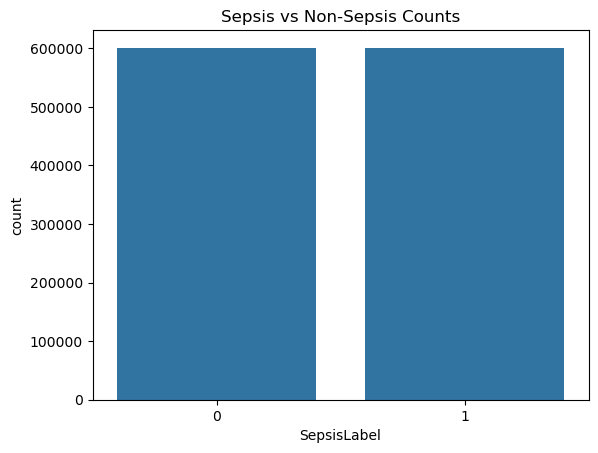

In [60]:
y_res_df = pd.DataFrame(y_train_resampled, columns=["SepsisLabel"])
sns.countplot(x='SepsisLabel', data=y_res_df)
plt.title('Sepsis vs Non-Sepsis Counts')
plt.show()


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# ----------------------
# Step 5: Train models
# ----------------------

# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_resampled, y_train_resampled)

# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_resampled, y_train_resampled)

# ----------------------
# Step 6: Predictions
# ----------------------
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

# Optional: get predicted probabilities for ROC AUC
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:,1]
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:,1]

# ----------------------
# Step 7: Evaluation
# ----------------------

print("===== Logistic Regression =====")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))

print("\n===== Random Forest =====")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))


===== Logistic Regression =====
[[109805  40438]
 [   875   1281]]
              precision    recall  f1-score   support

           0       0.99      0.73      0.84    150243
           1       0.03      0.59      0.06      2156

    accuracy                           0.73    152399
   macro avg       0.51      0.66      0.45    152399
weighted avg       0.98      0.73      0.83    152399

ROC AUC: 0.7090575018624435

===== Random Forest =====
[[150027    216]
 [  1315    841]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    150243
           1       0.80      0.39      0.52      2156

    accuracy                           0.99    152399
   macro avg       0.89      0.69      0.76    152399
weighted avg       0.99      0.99      0.99    152399

ROC AUC: 0.9501590216057778


                 Model  Accuracy  Precision (Class 0)  Recall (Class 0)  \
0  Logistic Regression  0.728916             0.992094          0.730849   
1        Random Forest  0.989954             0.991311          0.998562   

   F1-score (Class 0)  Precision (Class 1)  Recall (Class 1)  \
0            0.841666             0.030705          0.594156   
1            0.994923             0.795648          0.390074   

   F1-score (Class 1)   ROC AUC  
0            0.058393  0.709058  
1            0.523498  0.950159  


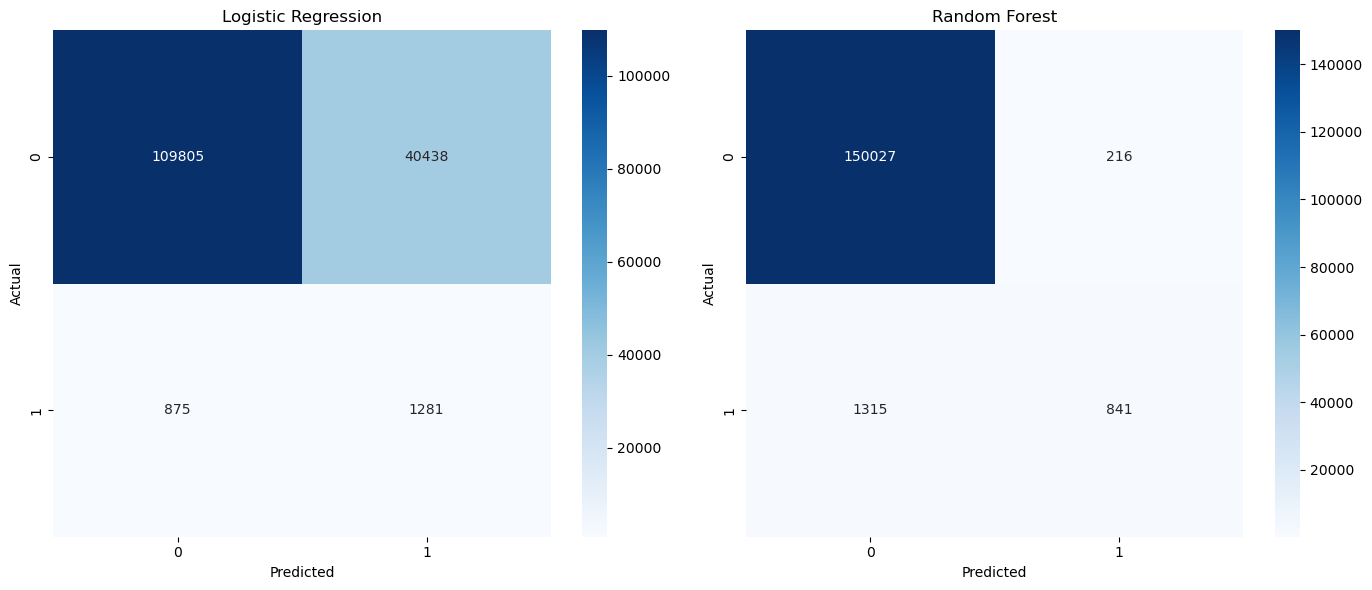

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Models and predictions (assuming these are already trained)
models = {
    "Logistic Regression": (lr_model, y_pred_lr, y_prob_lr),
    "Random Forest": (rf_model, y_pred_rf, y_prob_rf)
}

# Prepare a results dataframe
results_list = []

for name, (model, y_pred, y_prob) in models.items():
    # Classification report as dict
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results_list.append({
        "Model": name,
        "Accuracy": report['accuracy'],
        "Precision (Class 0)": report['0']['precision'],
        "Recall (Class 0)": report['0']['recall'],
        "F1-score (Class 0)": report['0']['f1-score'],
        "Precision (Class 1)": report['1']['precision'],
        "Recall (Class 1)": report['1']['recall'],
        "F1-score (Class 1)": report['1']['f1-score'],
        "ROC AUC": roc_auc_score(y_test, y_prob)
    })

df_results = pd.DataFrame(results_list)
print(df_results)

# Confusion matrix plots
fig, axes = plt.subplots(1, 2, figsize=(14,6))

for ax, (name, (model, y_pred, _)) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


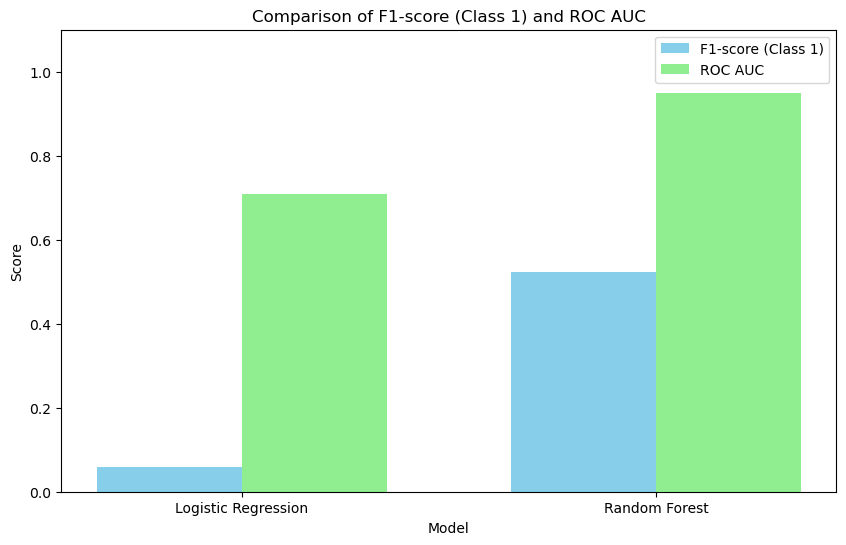

In [66]:
# Assuming df_results is already created from previous automated code

# Set figure size
plt.figure(figsize=(10,6))

# Bar width
bar_width = 0.35
index = np.arange(2)  # 2 models

# F1-score for Class 1 (minority class)
plt.bar(index, df_results['F1-score (Class 1)'], bar_width, label='F1-score (Class 1)', color='skyblue')

# ROC AUC
plt.bar(index + bar_width, df_results['ROC AUC'], bar_width, label='ROC AUC', color='lightgreen')

# Labels and ticks
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of F1-score (Class 1) and ROC AUC')
plt.xticks(index + bar_width / 2, df_results['Model'])
plt.ylim(0,1.1)
plt.legend()
plt.show()


In [68]:
# Predict labels
y_test_pred = rf_model.predict(X_test_scaled)

# Predict probabilities (for ROC AUC or threshold tuning)
y_test_prob = rf_model.predict_proba(X_test_scaled)[:,1]


In [70]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cm)

# Classification report
report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", report)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_test_prob)
print("ROC AUC:", roc_auc)


Confusion Matrix:
 [[150027    216]
 [  1315    841]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    150243
           1       0.80      0.39      0.52      2156

    accuracy                           0.99    152399
   macro avg       0.89      0.69      0.76    152399
weighted avg       0.99      0.99      0.99    152399

ROC AUC: 0.9501590216057778


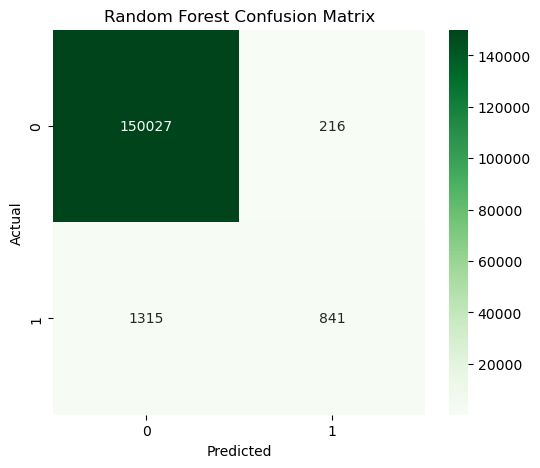

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [74]:
threshold = 0.3  # example, lowers threshold to catch more positives
y_test_pred_new = (y_test_prob >= threshold).astype(int)

print(classification_report(y_test, y_test_pred_new))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99    150243
           1       0.43      0.63      0.51      2156

    accuracy                           0.98    152399
   macro avg       0.71      0.81      0.75    152399
weighted avg       0.99      0.98      0.98    152399



In [76]:
import pandas as pd
import numpy as np

# -----------------------------
# 1️⃣ Save training and test data
# -----------------------------
# Combine features and target for saving
train_df = X_train.copy()
train_df['SepsisLabel'] = y_train
train_df.to_excel("training_data.xlsx", index=False)

test_df = X_test.copy()
test_df['SepsisLabel'] = y_test
test_df.to_excel("test_data.xlsx", index=False)

# -----------------------------
# 2️⃣ Make predictions on test set
# -----------------------------
y_test_pred = rf_model.predict(X_test_scaled)
y_test_prob = rf_model.predict_proba(X_test_scaled)[:,1]

# -----------------------------
# 3️⃣ Save test results
# -----------------------------
results_df = X_test.copy()
results_df['Actual'] = y_test
results_df['Predicted'] = y_test_pred
results_df['Predicted_Prob'] = y_test_prob

results_df.to_excel("test_results.xlsx", index=False)

print("All three Excel files created successfully!")


All three Excel files created successfully!
